In [1]:
#import libraries
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import battery data
Rl_b, V_b, I_b, Verr_b, Ierr_b = np.loadtxt("wiring_battery.csv", skiprows = 1, delimiter = ',', unpack = True)

In [3]:
#define a linear model function
def f(x, m, b):
    return (m*x+b)

In [4]:
# store p_opt and p_cov from the linear fit function
p_opt_b, p_cov_b = curve_fit(f, I_b, V_b, p0 = (-1,-1), sigma = Verr_b, absolute_sigma = True)
#store the optimal slope
m_opt_b = p_opt_b[0]
#store the optimal b value
b_opt_b = p_opt_b[1]

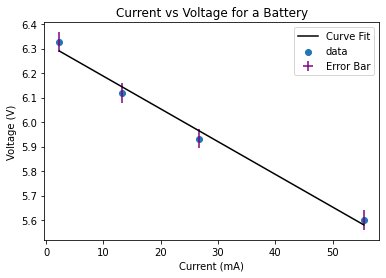

In [5]:
#plot V vs I
plt.scatter(I_b, V_b, label = "data")

#plot errorbars
plt.errorbar(I_b, V_b, xerr = Ierr_b, yerr = Verr_b, ls = "none", color = 'purple', label = "Error Bar")

#plot the curve fit
plt.plot(I_b, f(I_b,m_opt_b, b_opt_b), color = "black", label = "Curve Fit")

#set title and axis
plt.title("Current vs Voltage for a Battery")
plt.xlabel("Current (mA)")
plt.ylabel("Voltage (V)")

#show legend
plt.legend(loc = "upper right")

In [6]:
#import the data supply data for 6.5V, 10V, 15V and 20V power supply

Rl_ps, V_ps, I_ps, Verr_ps, Ierr_ps = np.loadtxt("wiring_ps.csv", skiprows = 1, delimiter = ',', unpack = True)

Rl_ps10, V_ps10, I_ps10, Verr_ps10, Ierr_ps10 = np.loadtxt("wiring_ps10.csv", skiprows = 1, delimiter = ',', unpack = True)

Rl_ps15, V_ps15, I_ps15, Verr_ps15, Ierr_ps15 = np.loadtxt("wiring_ps15.csv", skiprows = 1, delimiter = ',', unpack = True)

Rl_ps20, V_ps20, I_ps20, Verr_ps20, Ierr_ps20 = np.loadtxt("wiring_ps20.csv", skiprows = 1, delimiter = ',', unpack = True)

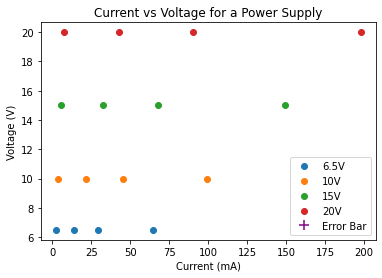

In [7]:
#plot power supply data
plt.scatter(I_ps, V_ps, label = "6.5V")
plt.scatter(I_ps10, V_ps10, label = "10V")
plt.scatter(I_ps15, V_ps15, label = "15V")
plt.scatter(I_ps20, V_ps20, label = "20V")

#plot error bars
plt.errorbar(I_ps, V_ps, xerr = Ierr_ps, yerr = Verr_ps, ls = "none", color = 'purple', label = "Error Bar")
plt.errorbar(I_ps10, V_ps10, xerr = Ierr_ps10, yerr = Verr_ps10, ls = "none", color = 'purple')
plt.errorbar(I_ps15, V_ps15, xerr = Ierr_ps15, yerr = Verr_ps15, ls = "none", color = 'purple')
plt.errorbar(I_ps20, V_ps20, xerr = Ierr_ps20, yerr = Verr_ps20, ls = "none", color = 'purple')

#set title and axis
plt.title("Current vs Voltage for a Power Supply")
plt.xlabel("Current (mA)")
plt.ylabel("Voltage (V)")

#show legend
plt.legend(loc = "lower right")

In [8]:
#print resistances for battery and power supply
print("Rb =", -1*m_opt_b)
print("Rps =", 0)

Rb = 0.013357856011585161
Rps = 0


In [9]:
#define reduced chi squared function
def chi(N, n, yi, xi, sigma_i, m, b):
    v = N-n
    ye = f(xi, m, b)
    chi = np.sum(((yi-ye)**2)/(sigma_i**2))
    chi = chi/v
    return chi

In [10]:
#battery reduced chi squared
chib = chi(4, 2, V_b, I_b, Verr_b, m_opt_b, b_opt_b)
chib

1.040184790897989

In [11]:
#6.5V power supply reduced chi squared
chi_ps = chi(4, 2, V_ps, I_ps, Verr_ps, 0, V_ps)
chi_ps

0.0

In [12]:
#10V power supply reduced chi squared
chi_ps10 = chi(4, 2, V_ps10, I_ps10, Verr_ps10, 0, V_ps10)
chi_ps10

0.0

In [13]:
#15V power supply reduced chi squared
chi_ps15 = chi(4, 2, V_ps15, I_ps15, Verr_ps15, 0, V_ps15)
chi_ps15

0.0

In [14]:
#20V power supply reduced chi squared
chi_ps20 = chi(4, 2, V_ps20, I_ps20, Verr_ps20, 0, V_ps20)
chi_ps20

0.0